<a href="https://colab.research.google.com/github/vinayakrajurs/Autoformer-Battery-Dataset/blob/main/Autoformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Synthetic Battery Parameter Generation using Auto-Correlation Mechanism** 

### **1. Mounting Drive**

1. Download the zip code from github

2. Upload the downloaded file to your drive and open the file using Zip extractor

3. Extract all the files in the drive

4. Mount the Drive by running the cell and copy-pasting the code and press Enter

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


### **2. Changing Directory path**

###### **Steps To Follow**

1. Once the drive has been mounted, go to the folder icon visible on the left hand side.

2. Click on the drive folder.

3. There find the folder containing the run.py file.

4. Right click on the folder and click on the folder and select the copy path option.

5. Make sure to copy and paste the path of the folder containing the run.py file in the code below. 

6. Paste the file path after %cd




In [ ]:
%cd /content/drive/MyDrive/Autoformer_main/Autoformer-main
!ls

/content/drive/MyDrive/Autoformer_main/Autoformer-main
 checkpoints	   data_provider   LICENSE   README.md	  run.py	 utils
'Copy of run.py'   exp		   models    results	  scripts
 data		   layers	   pic	     result.txt   test_results


### **3. Running the Main code**

1. All changes to the Prediction Length, epochs, dataset, etc can be made in the run.py file
2. Insertion of a new dataset must be done in the data folder as well as adding the data as a custom data in data_loader.py Line 192
3. You may make changes in the dataset used in run.py and target to be run

In [ ]:
!python run.py --is_training 1 --model_id test --model Autoformer --data dataset4

Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=3, checkpoints='./checkpoints/', d_ff=2048, d_layers=1, d_model=512, data='dataset4', data_path='dataset4.csv', dec_in=3, des='test', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', enc_in=3, factor=5, features='M', freq='s', gpu=0, inverse=True, is_training=1, itr=2, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Autoformer', model_id='test', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=10, pred_len=96, root_path='./data/ETT', seq_len=96, target='Voltage', train_epochs=6, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
>>>>>>>start training : test_Autoformer_dataset4_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc5_ebtimeF_dtTrue_test_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 2699
val 319
test 730
Epoch: 1 cost time: 16.867358684539795
Epoch: 1, Steps: 84 | Train Loss: 0.6563472 Vali Loss: 0.7931499 Test Loss: 1.2

### **4. Results**

##### **Changing Directory path**

1. Once the code is run, a results folder will be created in the same folder which contains run.py file.

2. The result folder contains 2 folders for train and test runs.

3. Copy the path for either one of the folders and paste it in the code below.
             
4. %cd /content/drive/MyDrive/Autoformer_main/Autoformer-main/results/test_Autoformer_dataset4_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc5_ebtimeF_dtTrue_test_1

5. The folder addres in which the result is stored will be printed while running the run.py code in the cell above

6. The underline code depicts the address of the test results

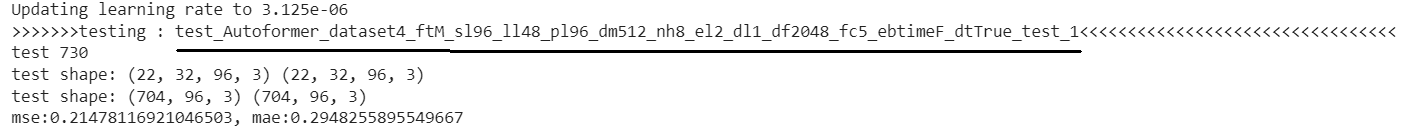



In [ ]:
%cd /content/drive/MyDrive/Autoformer_main/Autoformer-main/results/test_Autoformer_dataset4_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc5_ebtimeF_dtTrue_test_1
!ls

/content/drive/MyDrive/Autoformer_main/Autoformer-main/results/test_Autoformer_dataset4_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc5_ebtimeF_dtTrue_test_1


##### **4 a. True and Prediction values**

1. When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment

2. The results of test experiment will be saved in ./results/{setting}/pred.npy (prediction of test dataset) and ./results/{setting}/true.npy (groundtruth of test dataset)

In [ ]:
import numpy as np
preds = np.load('pred.npy')
trues = np.load('true.npy')
# [samples, pred_len, dimensions]
import matplotlib.pyplot as plt
import seaborn as sns


##### **4 b. Matplotlib to plot the results**

1. You can remove the # from .savefig and .download to save and download the plot in pdf format on your local PC 

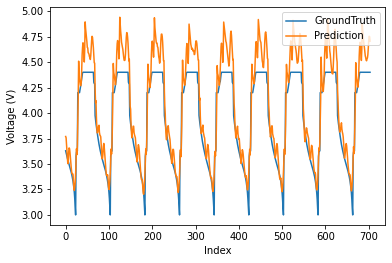

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot (trues[:,1,-1], label='GroundTruth')
plt.plot (preds[:,1,-1], label='Prediction')
plt.legend(loc='upper right');
plt.xlabel('Index')
plt.ylabel('Voltage (V)')
#plt.yticks(np.arange(-4, 7, 1))
from google.colab import files
#plt.savefig('Autoformer_mendeley_Charge_Capacity_pred_length_96_true.pdf')
#files.download('Autoformer_mendeley_Charge_Capacity_pred_length_96_true.pdf')
plt.show() # .4 .4

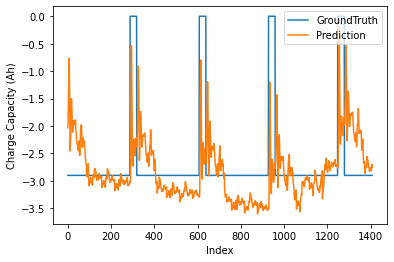

In [ ]:
# Example Plot 2
import matplotlib.pyplot as plt
plt.figure()
plt.plot (trues[:,1,-1], label='GroundTruth')
plt.plot (preds[:,1,-1], label='Prediction')
plt.legend(loc='upper right');
plt.xlabel('Index')
plt.ylabel('Charge Capacity (Ah)')
#plt.yticks(np.arange(-4, 7, 1))
from google.colab import files
#plt.savefig('Autoformer_mendeley_Charge_Capacity_pred_length_96_true.pdf')
#files.download('Autoformer_mendeley_Charge_Capacity_pred_length_96_true.pdf')
plt.show() # .4 .4

In [ ]:
#end